### Problem 1

Characterize the data set in this [CSV](A1-Problem1.csv) file using descriptive statistics.
The comma-separated separated file contains just 1 column and 1000 rows.


1. Load the data, e.g., using routines in `numpy` or `pandas` (1 pt)
2. Calculate the relevant quantitative measures: mean, variance, skewness, kurtoisis (1 pt)
3. Create a histogram of the data and plot it  (1 pt)
4. Use KDE with Gaussian kernels to approximate the density and compare that visually to the histogram (2 pts)
5. Summarize the results with your own words (1 pt)

Total of 6 points

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def normMoments(X,k,xbar,N,s):
    return np.sum((X-xbar)**k , axis =0)/((N-1)*s**k);

#### Loading the data, e.g., using routines in `numpy` or `pandas`

In [4]:
Data = pd.read_csv('A1-Problem1.csv');
X = Data.to_numpy()

#### Calculate the relevant quantitative measures: mean, variance, skewness, kurtoisis

In [23]:
N   = len(X);
avg = np.mean(X);
s2  = np.sum( (X-avg)**2, axis=0) /(N-1);
s   = np.sqrt(s2) ;


skeweness = normMoments(X,3,avg,N,s);
kurtoisis = normMoments(X,4,avg,N,s);

print ('The Average of the data set is %f' % (avg))
print ('The Variance of the data set is %f' % (s2))
print ('The Skeweness of the data set is %f' % (skeweness))
print ('The Kurtoisis of the data set is %f' % (kurtoisis))

The Average of the data set is -48.855055
The Variance of the data set is 0.405763
The Skeweness of the data set is 2.527032
The Kurtoisis of the data set is 11.448408


#### Create a histogram of the data and plot it

(array([160., 371., 269., 124.,  30.,  13.,   4.,   3.,   1.,  24.]),
 array([-49.7 , -49.31, -48.92, -48.53, -48.14, -47.75, -47.36, -46.97,
        -46.58, -46.19, -45.8 ]),
 <a list of 10 Patch objects>)

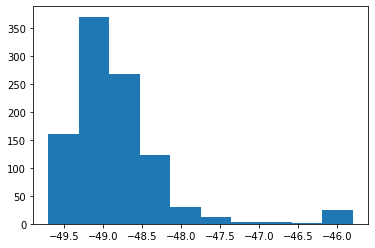

In [7]:
hist(X)

In [8]:
def Gaussian_kernel(x):
    return np.exp(-(np.linalg.norm(x, axis=2))**2/2) / (2*np.pi)**(1/2)

def kernel_density_estimator(U, X, h):
    return np.mean(Gaussian_kernel((U[:,newaxis]-X)/h), axis = 1) / h

#### Use KDE with Gaussian kernels to approximate the density and compare that visually to the histogram

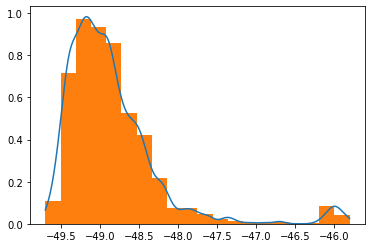

In [18]:
X = X.reshape(-1,1)
U = np.linspace(min(X),max(X),X.shape[0]).reshape(-1,1)

f_u = kernel_density_estimator(U,X,0.075)

plot(U,f_u);
hist(X,20,density=True);

#### Summarize the results with your own words

The purpose of a Kernel Density Estimation, is to develop a smooth line that provies the best estimation of a random variable at a given point. For this problem we were given a data set of a thousand random variables. As such, a KDE with Gaussian Kernals was used to develop an estimation of the random variables. In order to achieve the best estimation, an H = 0.075 was used to develp the f_u 